## TESLA CAR PRICE PREDICTION
              
                  

PyForest is an open-source python library that imports all the major libraries that are required for python programming including machine learning and deep learning.

In [80]:
!pip install pyforest
import pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading the dataset:

In [81]:
dataset=pd.read_csv("/content/CarPrice_Assignment.csv")

<IPython.core.display.Javascript object>

In [82]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [83]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [84]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [86]:
dataset.shape

(205, 26)

In [87]:
dataset=dataset.drop(["car_ID"],axis=1)

# Missing values:

In [88]:
dataset.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Numeric Feautures:

In [89]:
int_columns = [feature for feature in dataset.columns if dataset[feature].dtype == 'int64']


In [90]:
float_columns=[feature for feature in dataset.columns if dataset[feature].dtype == 'float64']

In [91]:
numeric=int_columns+float_columns

In [92]:
numeric

['symboling',
 'curbweight',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

In [93]:
len(numeric)

15

# Numeric Features- Univariate Analysis:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

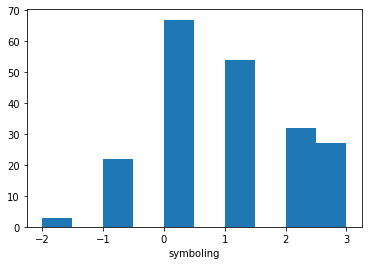

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

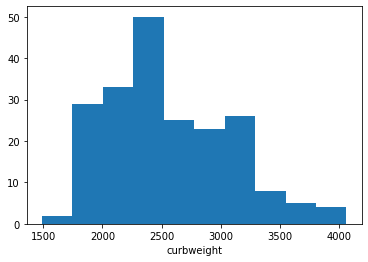

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

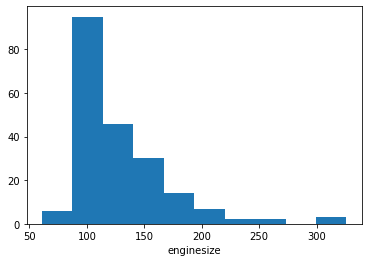

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

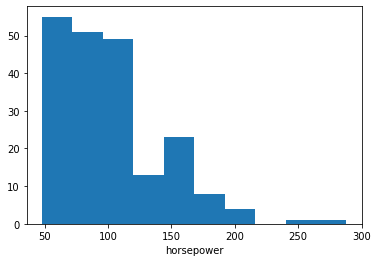

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

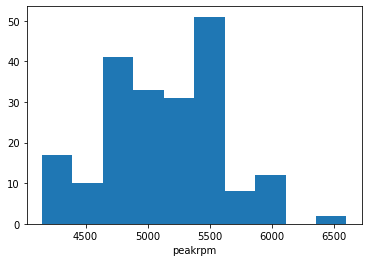

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

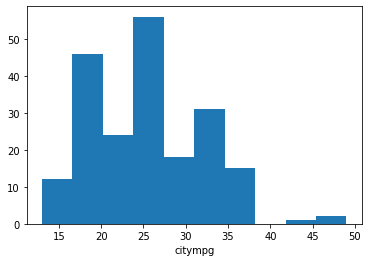

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

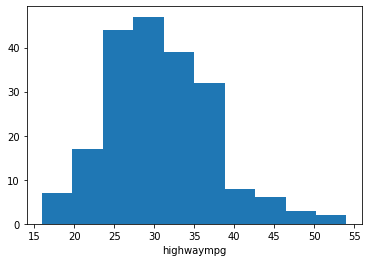

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

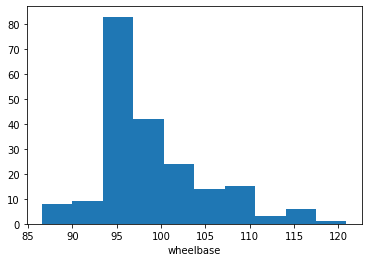

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

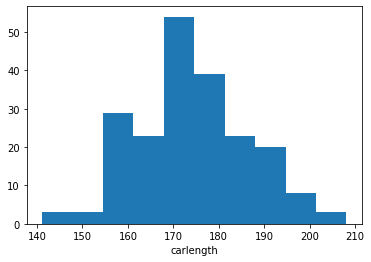

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

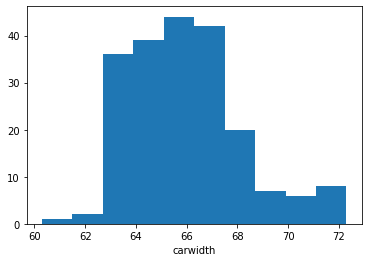

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

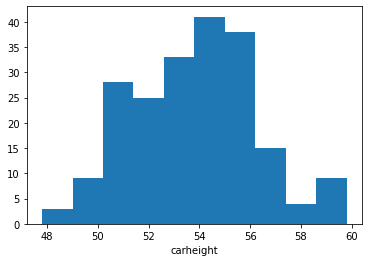

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

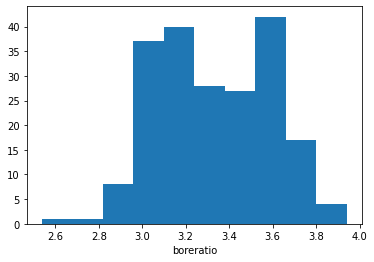

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

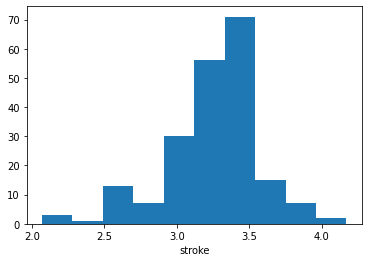

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

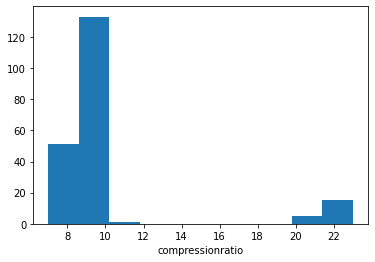

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

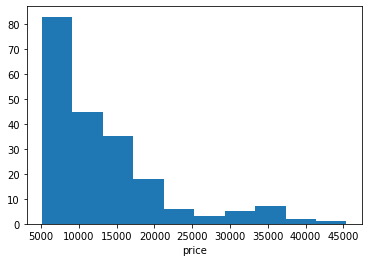

In [94]:
for i in numeric:
  plt.hist(dataset[i])
  plt.xlabel(i)
  plt.show()

# Numeric Features- Bivariate Analysis:

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

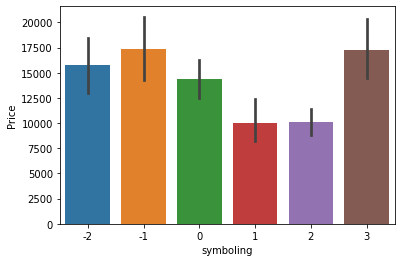

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

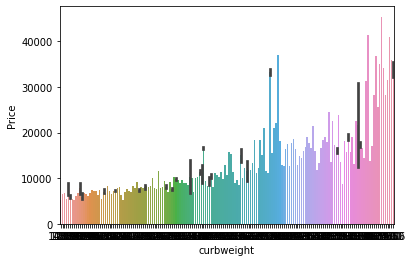

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

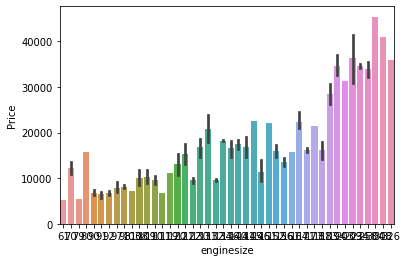

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

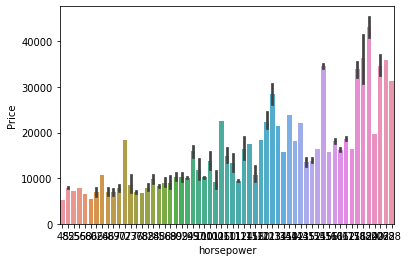

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

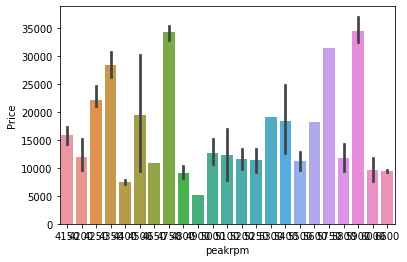

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

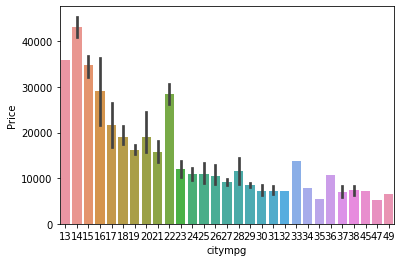

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

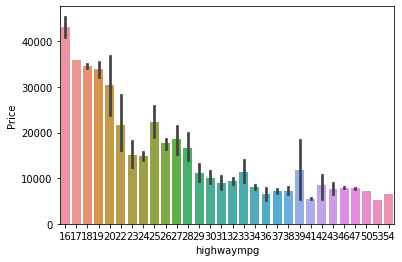

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

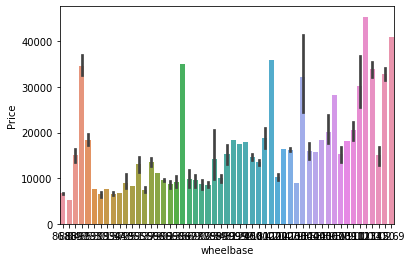

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

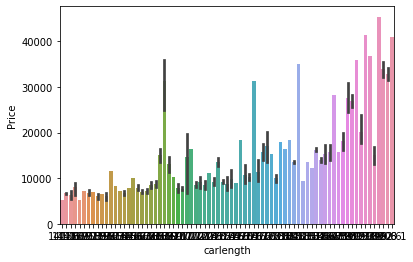

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

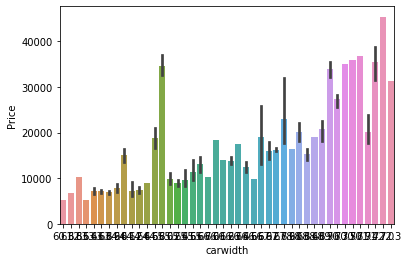

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

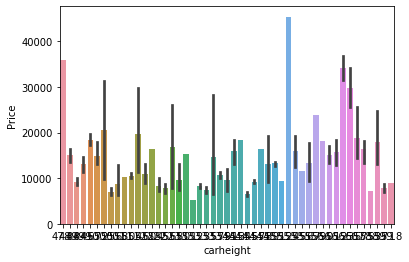

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

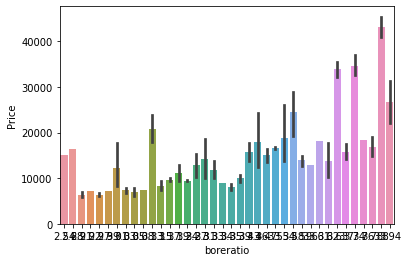

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

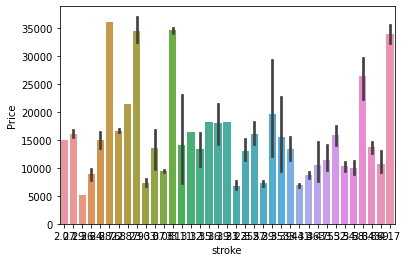

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

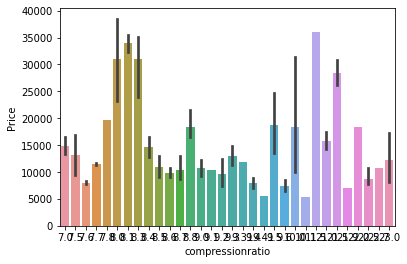

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

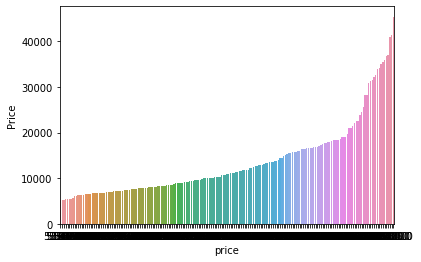

In [95]:
for i in numeric:
  sns.barplot(dataset[i],dataset["price"])
  plt.xlabel(i)
  plt.ylabel("Price")
  plt.show()

# Continuous Features:

In [96]:
continuous=['curbweight',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke','price']

# Converting continuous features to Gaussian Distribution:

In [97]:
for i in continuous:
  dataset[i]=np.log(dataset[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizing continuous features using Q-Q Plot:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

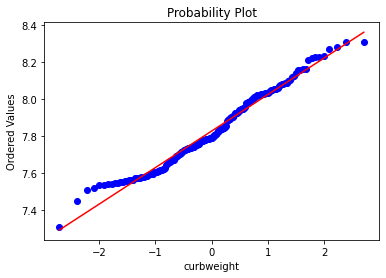

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

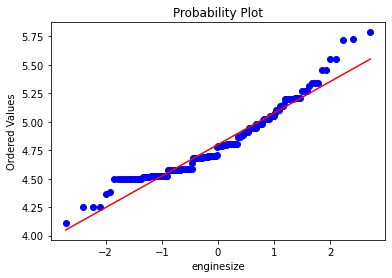

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

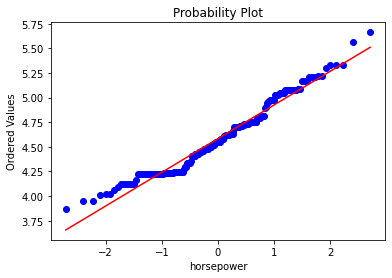

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

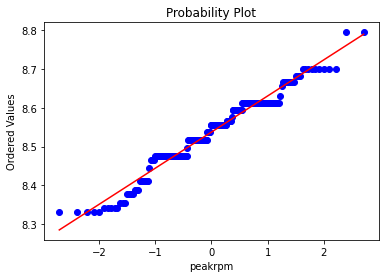

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

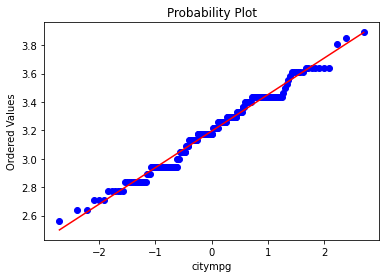

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

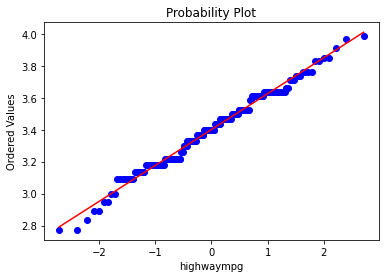

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

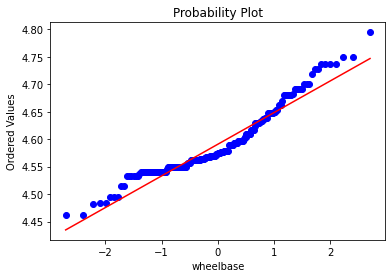

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

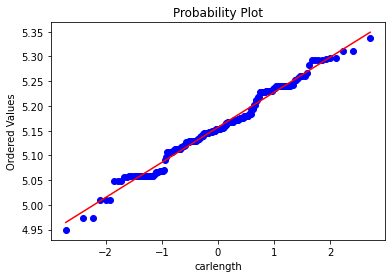

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

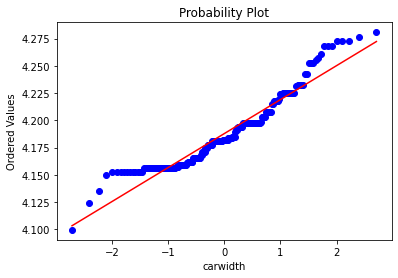

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

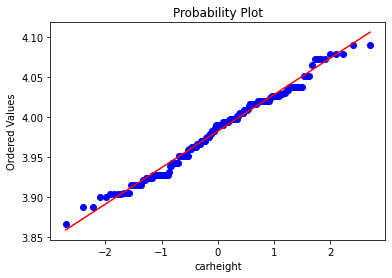

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

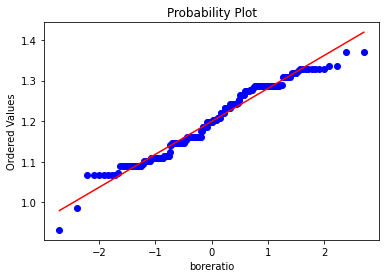

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

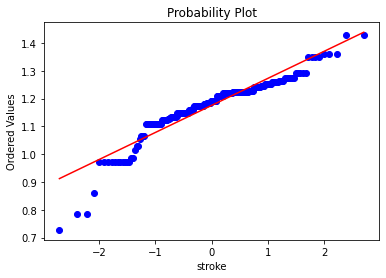

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

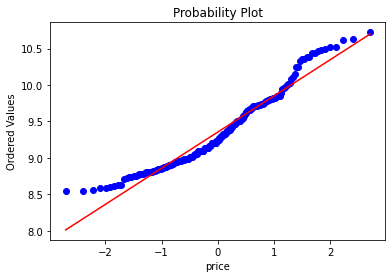

In [98]:
import scipy.stats as stat
import pylab
for i in continuous:
  stats.probplot(dataset[i],plot=pylab)
  plt.xlabel(i)
  plt.show()

# Boxplots for Numeric Features:

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

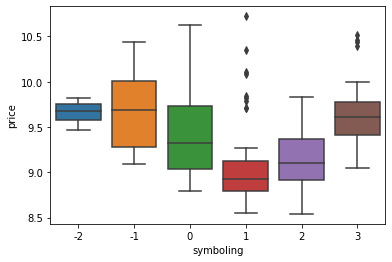

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

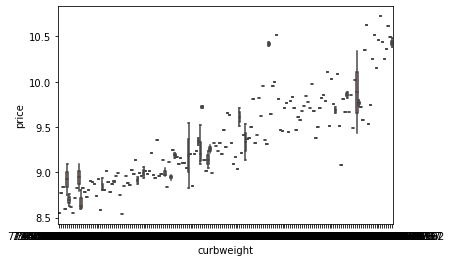

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

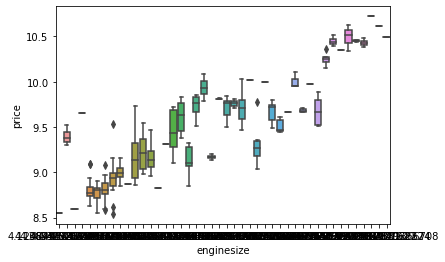

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

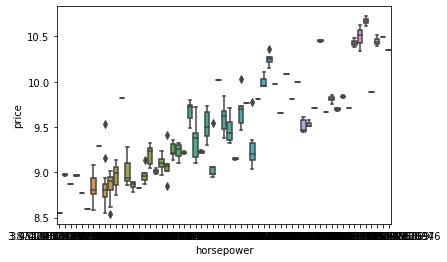

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

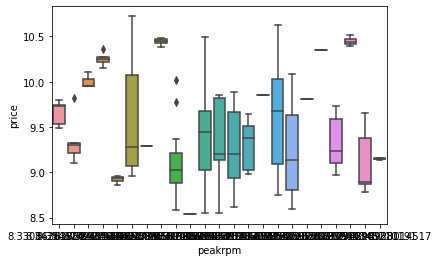

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

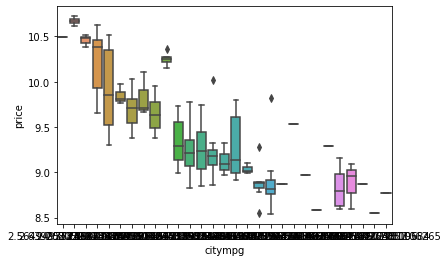

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

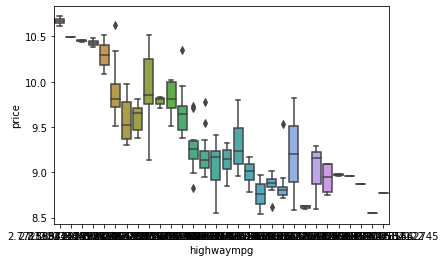

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

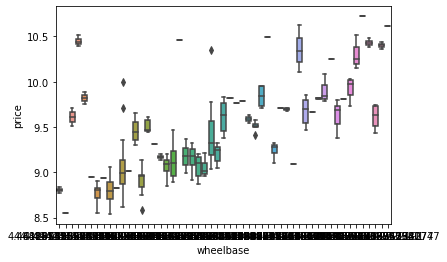

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

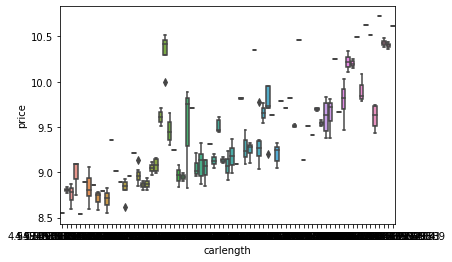

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

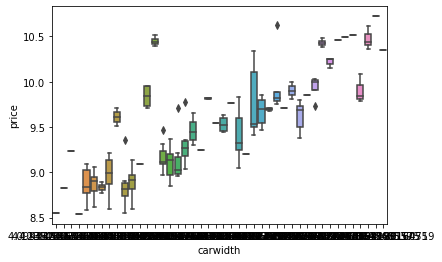

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

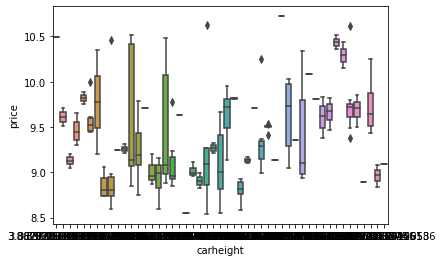

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

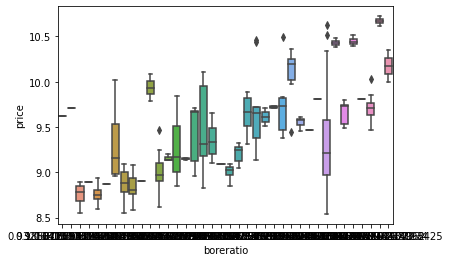

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

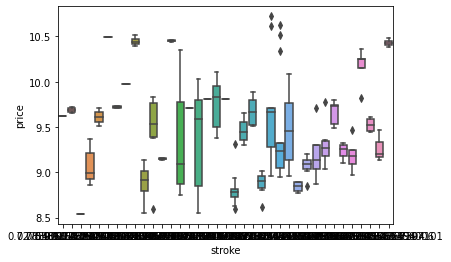

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

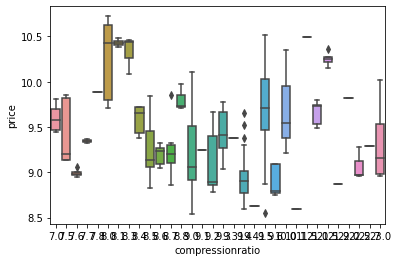

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

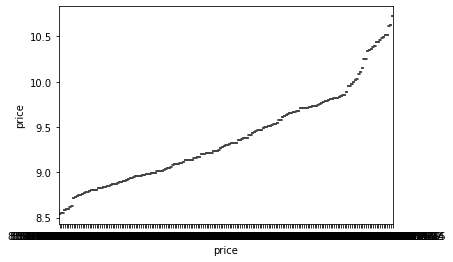

In [99]:
for i in numeric:
  sns.boxplot(dataset[i],dataset["price"])
  plt.show()

# Outlier Treatment:

In [100]:
for i in numeric:
  IQR=dataset[i].quantile(0.75)-(dataset[i].quantile(0.25))
  lower=dataset[i].quantile(0.25)-(1.5*IQR)
  upper=dataset[i].quantile(0.75)+(1.5*IQR)

In [101]:
for i in numeric:
  dataset.loc[(dataset[i]>upper,i)]==upper
  dataset.loc[(dataset[i]<lower,i)]==lower

Categorical Features:

In [102]:
category=[feature for feature in dataset.columns if (dataset[feature].dtypes=="object")]

In [103]:
category

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# Value_counts for Categorical Features:

In [104]:
for i in category:
  print("The categorical feature is",i)
  print(dataset[i].value_counts())
  print("The sum is",len(dataset[i].unique()))
  print()

The categorical feature is CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
The sum is 147

The categorical feature is fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
The sum is 2

The categorical feature is aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
The sum is 2

The categorical feature is doornumber
four    115
two      90
Name: doornumber, dtype: int64
The sum is 2

The categorical feature is carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
The sum is 5

The categorical feature is drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
The sum is 3

The categorical 

In [105]:
dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.484132,5.128715,...,4.867534,mpfi,1.244155,0.985817,9.0,4.709530,8.517193,3.044522,3.295837,9.510075
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.484132,5.128715,...,4.867534,mpfi,1.244155,0.985817,9.0,4.709530,8.517193,3.044522,3.295837,9.711116
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.548600,5.142832,...,5.023881,mpfi,0.985817,1.244155,9.0,5.036953,8.517193,2.944439,3.258097,9.711116
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.603168,5.173887,...,4.691348,mpfi,1.160021,1.223775,10.0,4.624973,8.612503,3.178054,3.401197,9.543235
4,2,audi 100ls,gas,std,four,sedan,4wd,front,4.599152,5.173887,...,4.912655,mpfi,1.160021,1.223775,8.0,4.744932,8.612503,2.890372,3.091042,9.767095


# Binary Feature encoding using pd.get_dummies:

In [106]:
fuel=pd.get_dummies(dataset["fueltype"],drop_first=True)

<IPython.core.display.Javascript object>

In [107]:
aspire=pd.get_dummies(dataset["aspiration"],drop_first=True)

<IPython.core.display.Javascript object>

In [108]:
doorno=pd.get_dummies(dataset["doornumber"],drop_first=True)

<IPython.core.display.Javascript object>

In [109]:
engine=pd.get_dummies(dataset["enginelocation"],drop_first=True)

<IPython.core.display.Javascript object>

In [110]:
dataset.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [111]:
dataset=dataset.drop(["fueltype"],axis=1)

In [112]:
dataset=dataset.drop(['aspiration'],axis=1)

In [113]:
dataset=dataset.drop(['doornumber'],axis=1)

In [114]:
dataset=dataset.drop(['enginelocation'],axis=1)

In [115]:
dataset=pd.concat([dataset,fuel,aspire,doorno,engine],axis=1)

<IPython.core.display.Javascript object>

In [116]:
dataset.head()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,rear
0,3,alfa-romero giulia,convertible,rwd,4.484132,5.128715,4.160444,3.887730,7.843064,dohc,...,9.0,4.709530,8.517193,3.044522,3.295837,9.510075,1,0,1,0
1,3,alfa-romero stelvio,convertible,rwd,4.484132,5.128715,4.160444,3.887730,7.843064,dohc,...,9.0,4.709530,8.517193,3.044522,3.295837,9.711116,1,0,1,0
2,1,alfa-romero Quadrifoglio,hatchback,rwd,4.548600,5.142832,4.182050,3.958907,7.945555,ohcv,...,9.0,5.036953,8.517193,2.944439,3.258097,9.711116,1,0,1,0
3,2,audi 100 ls,sedan,fwd,4.603168,5.173887,4.192680,3.994524,7.756623,ohc,...,10.0,4.624973,8.612503,3.178054,3.401197,9.543235,1,0,0,0
4,2,audi 100ls,sedan,4wd,4.599152,5.173887,4.195697,3.994524,7.945910,ohc,...,8.0,4.744932,8.612503,2.890372,3.091042,9.767095,1,0,0,0


In [117]:
len(dataset.columns)

25

# Car Name Encoding:

In [118]:
dataset["CarName"].value_counts().sort_values(ascending=False)

toyota corona           6
peugeot 504             6
toyota corolla          6
subaru dl               4
mitsubishi mirage g4    3
                       ..
toyota tercel           1
subaru r1               1
toyota cressida         1
toyouta tercel          1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [119]:
dataset["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [120]:
dataset.columns

Index(['symboling', 'CarName', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'gas', 'turbo', 'two', 'rear'],
      dtype='object')

# Count Encoding:

In [121]:
dict1=dataset["carbody"].value_counts().to_dict()
dict2=dataset["enginetype"].value_counts().to_dict()
dict3=dataset["fuelsystem"].value_counts().to_dict()


In [122]:
dataset["carbody"]=dataset["carbody"].map(dict1)
dataset["enginetype"]=dataset["enginetype"].map(dict2)
dataset["fuelsystem"]=dataset["fuelsystem"].map(dict3)

In [123]:
dataset.head()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,rear
0,3,alfa-romero giulia,6,rwd,4.484132,5.128715,4.160444,3.887730,7.843064,12,...,9.0,4.709530,8.517193,3.044522,3.295837,9.510075,1,0,1,0
1,3,alfa-romero stelvio,6,rwd,4.484132,5.128715,4.160444,3.887730,7.843064,12,...,9.0,4.709530,8.517193,3.044522,3.295837,9.711116,1,0,1,0
2,1,alfa-romero Quadrifoglio,70,rwd,4.548600,5.142832,4.182050,3.958907,7.945555,13,...,9.0,5.036953,8.517193,2.944439,3.258097,9.711116,1,0,1,0
3,2,audi 100 ls,96,fwd,4.603168,5.173887,4.192680,3.994524,7.756623,148,...,10.0,4.624973,8.612503,3.178054,3.401197,9.543235,1,0,0,0
4,2,audi 100ls,96,4wd,4.599152,5.173887,4.195697,3.994524,7.945910,148,...,8.0,4.744932,8.612503,2.890372,3.091042,9.767095,1,0,0,0


# Binary encoding:

In [124]:
wheel=pd.get_dummies(dataset["drivewheel"],drop_first=True)

<IPython.core.display.Javascript object>

In [125]:
dataset=dataset.drop(['drivewheel'],axis=1)

In [126]:
dataset=pd.concat([dataset,wheel],axis=1)

<IPython.core.display.Javascript object>

In [127]:
dataset.head()

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,gas,turbo,two,rear,fwd,rwd
0,3,alfa-romero giulia,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,four,...,8.517193,3.044522,3.295837,9.510075,1,0,1,0,0,1
1,3,alfa-romero stelvio,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,four,...,8.517193,3.044522,3.295837,9.711116,1,0,1,0,0,1
2,1,alfa-romero Quadrifoglio,70,4.548600,5.142832,4.182050,3.958907,7.945555,13,six,...,8.517193,2.944439,3.258097,9.711116,1,0,1,0,0,1
3,2,audi 100 ls,96,4.603168,5.173887,4.192680,3.994524,7.756623,148,four,...,8.612503,3.178054,3.401197,9.543235,1,0,0,0,1,0
4,2,audi 100ls,96,4.599152,5.173887,4.195697,3.994524,7.945910,148,five,...,8.612503,2.890372,3.091042,9.767095,1,0,0,0,0,0


# Cylinder number encoding:

In [128]:
cylinder_no={"four":4,   
"six":6,
"five":5,
"eight":8,
"two":2,
"three":3,
"twelve":12}

In [129]:
dataset["cylindernumber"]=dataset["cylindernumber"].map(cylinder_no)

In [130]:
dataset.head()

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,gas,turbo,two,rear,fwd,rwd
0,3,alfa-romero giulia,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,4,...,8.517193,3.044522,3.295837,9.510075,1,0,1,0,0,1
1,3,alfa-romero stelvio,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,4,...,8.517193,3.044522,3.295837,9.711116,1,0,1,0,0,1
2,1,alfa-romero Quadrifoglio,70,4.548600,5.142832,4.182050,3.958907,7.945555,13,6,...,8.517193,2.944439,3.258097,9.711116,1,0,1,0,0,1
3,2,audi 100 ls,96,4.603168,5.173887,4.192680,3.994524,7.756623,148,4,...,8.612503,3.178054,3.401197,9.543235,1,0,0,0,1,0
4,2,audi 100ls,96,4.599152,5.173887,4.195697,3.994524,7.945910,148,5,...,8.612503,2.890372,3.091042,9.767095,1,0,0,0,0,0


In [131]:
dataset['CarName'] = dataset['CarName'].str.split(' ',expand=True)[0]

In [132]:
dataset.head(20)

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,gas,turbo,two,rear,fwd,rwd
0,3,alfa-romero,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,4,...,8.517193,3.044522,3.295837,9.510075,1,0,1,0,0,1
1,3,alfa-romero,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,4,...,8.517193,3.044522,3.295837,9.711116,1,0,1,0,0,1
2,1,alfa-romero,70,4.548600,5.142832,4.182050,3.958907,7.945555,13,6,...,8.517193,2.944439,3.258097,9.711116,1,0,1,0,0,1
3,2,audi,96,4.603168,5.173887,4.192680,3.994524,7.756623,148,4,...,8.612503,3.178054,3.401197,9.543235,1,0,0,0,1,0
4,2,audi,96,4.599152,5.173887,4.195697,3.994524,7.945910,148,5,...,8.612503,2.890372,3.091042,9.767095,1,0,0,0,0,0
5,2,audi,96,4.603168,5.177843,4.194190,3.972177,7.826842,148,5,...,8.612503,2.944439,3.218876,9.632335,1,0,1,0,1,0
6,1,audi,96,4.661551,5.261135,4.268298,4.019980,7.952967,148,5,...,8.612503,2.944439,3.218876,9.781885,1,0,0,0,1,0
7,1,audi,25,4.661551,5.261135,4.268298,4.019980,7.990915,148,5,...,8.612503,2.944439,3.218876,9.847975,1,0,0,0,1,0
8,1,audi,96,4.661551,5.261135,4.268298,4.023564,8.034631,148,5,...,8.612503,2.833213,2.995732,10.080587,1,1,0,0,1,0
9,0,audi,70,4.600158,5.182907,4.218036,3.951244,8.023880,148,5,...,8.612503,2.772589,3.091042,9.790272,1,1,1,0,0,0


# Target guided encoding for Car Name:

In [133]:
target_guided=dataset.groupby(['CarName'])["price"].median().sort_values(ascending=False).index

In [134]:
target_guided_encode={k:i for i,k in enumerate(target_guided,0)}

In [135]:
target_guided_encode

{'jaguar': 0,
 'buick': 1,
 'porsche': 2,
 'porcshce': 3,
 'bmw': 4,
 'volvo': 5,
 'audi': 6,
 'peugeot': 7,
 'mercury': 8,
 'alfa-romero': 9,
 'toyouta': 10,
 'saab': 11,
 'mazda': 12,
 'vw': 13,
 'renault': 14,
 'volkswagen': 15,
 'toyota': 16,
 'isuzu': 17,
 'mitsubishi': 18,
 'nissan': 19,
 'subaru': 20,
 'vokswagen': 21,
 'plymouth': 22,
 'dodge': 23,
 'honda': 24,
 'chevrolet': 25,
 'maxda': 26,
 'Nissan': 27}

In [136]:
dataset["CarName"]=dataset["CarName"].map(target_guided_encode)

In [137]:
dataset.head()

,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,gas,turbo,two,rear,fwd,rwd
0,3,9,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,4,...,8.517193,3.044522,3.295837,9.510075,1,0,1,0,0,1
1,3,9,6,4.484132,5.128715,4.160444,3.887730,7.843064,12,4,...,8.517193,3.044522,3.295837,9.711116,1,0,1,0,0,1
2,1,9,70,4.548600,5.142832,4.182050,3.958907,7.945555,13,6,...,8.517193,2.944439,3.258097,9.711116,1,0,1,0,0,1
3,2,6,96,4.603168,5.173887,4.192680,3.994524,7.756623,148,4,...,8.612503,3.178054,3.401197,9.543235,1,0,0,0,1,0
4,2,6,96,4.599152,5.173887,4.195697,3.994524,7.945910,148,5,...,8.612503,2.890372,3.091042,9.767095,1,0,0,0,0,0


# Train Test Split

In [138]:
x=dataset.drop(["price"],axis=1)
y=dataset["price"]

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70,random_state=42)

# Model: Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [143]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [144]:
ypred=model.predict(x_test)

# Evaluation:

In [145]:
from sklearn.metrics import r2_score,mean_squared_error,classification_report,roc_curve

In [146]:
print("MSE:",mean_squared_error(y_test,ypred))

MSE: 0.039123250151000245


In [147]:
r2=r2_score(y_test,ypred)

In [148]:
print("R2 Score",r2)

R2 Score 0.8302813656782739


# Model:RandomForestRegressor

In [149]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [150]:
ypredrf=rf.predict(x_test)

# Evaluation:

In [151]:
from sklearn.metrics import accuracy_score
print("RF Accuracy",mean_squared_error(y_test,ypredrf))

RF Accuracy 0.024433663862330268


In [152]:
print(r2_score(y_test,ypredrf))

0.894005532613328


 By SRI HARSHITHA P